In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
import geopandas as gpd
import os

df = pd.read_csv('drugs.csv')
df

,item,A_vida,A_binge,Cig_vida,Cig_30,Med_vida,ili_vida,ili_30,cat
0,12 a 17 anos,34.3,5.0,6.3,2.4,4.0,4.0,1.3,idade
1,18 a 24 anos,72.1,20.5,26.0,12.4,6.6,14.3,3.9,idade
2,25 a 34 anos,74.5,23.3,31.7,13.0,10.4,15.5,2.7,idade
3,35 a 44 anos,71.9,18.8,34.9,14.5,9.3,11.1,1.2,idade
4,45 a 54 anos,70.1,15.7,46.3,19.5,9.8,7.5,0.7,idade
5,55 a 65 anos,66.3,11.3,51.5,17.8,8.4,4.2,0.2,idade
6,Sem ou fundamental incompleto,69.5,15.9,47.8,21.0,8.1,8.2,1.2,escolaridade
7,Fundamental completo ou medio incompleto,70.1,19.0,38.0,17.1,8.9,11.6,2.0,escolaridade
8,Medio completo ou superior incompleto,71.9,19.4,29.8,11.1,9.5,10.9,1.8,escolaridade
9,Superior completo ou mais,76.5,20.4,32.9,9.4,10.9,16.6,2.4,escolaridade


# Prevalence of lifetime drug use

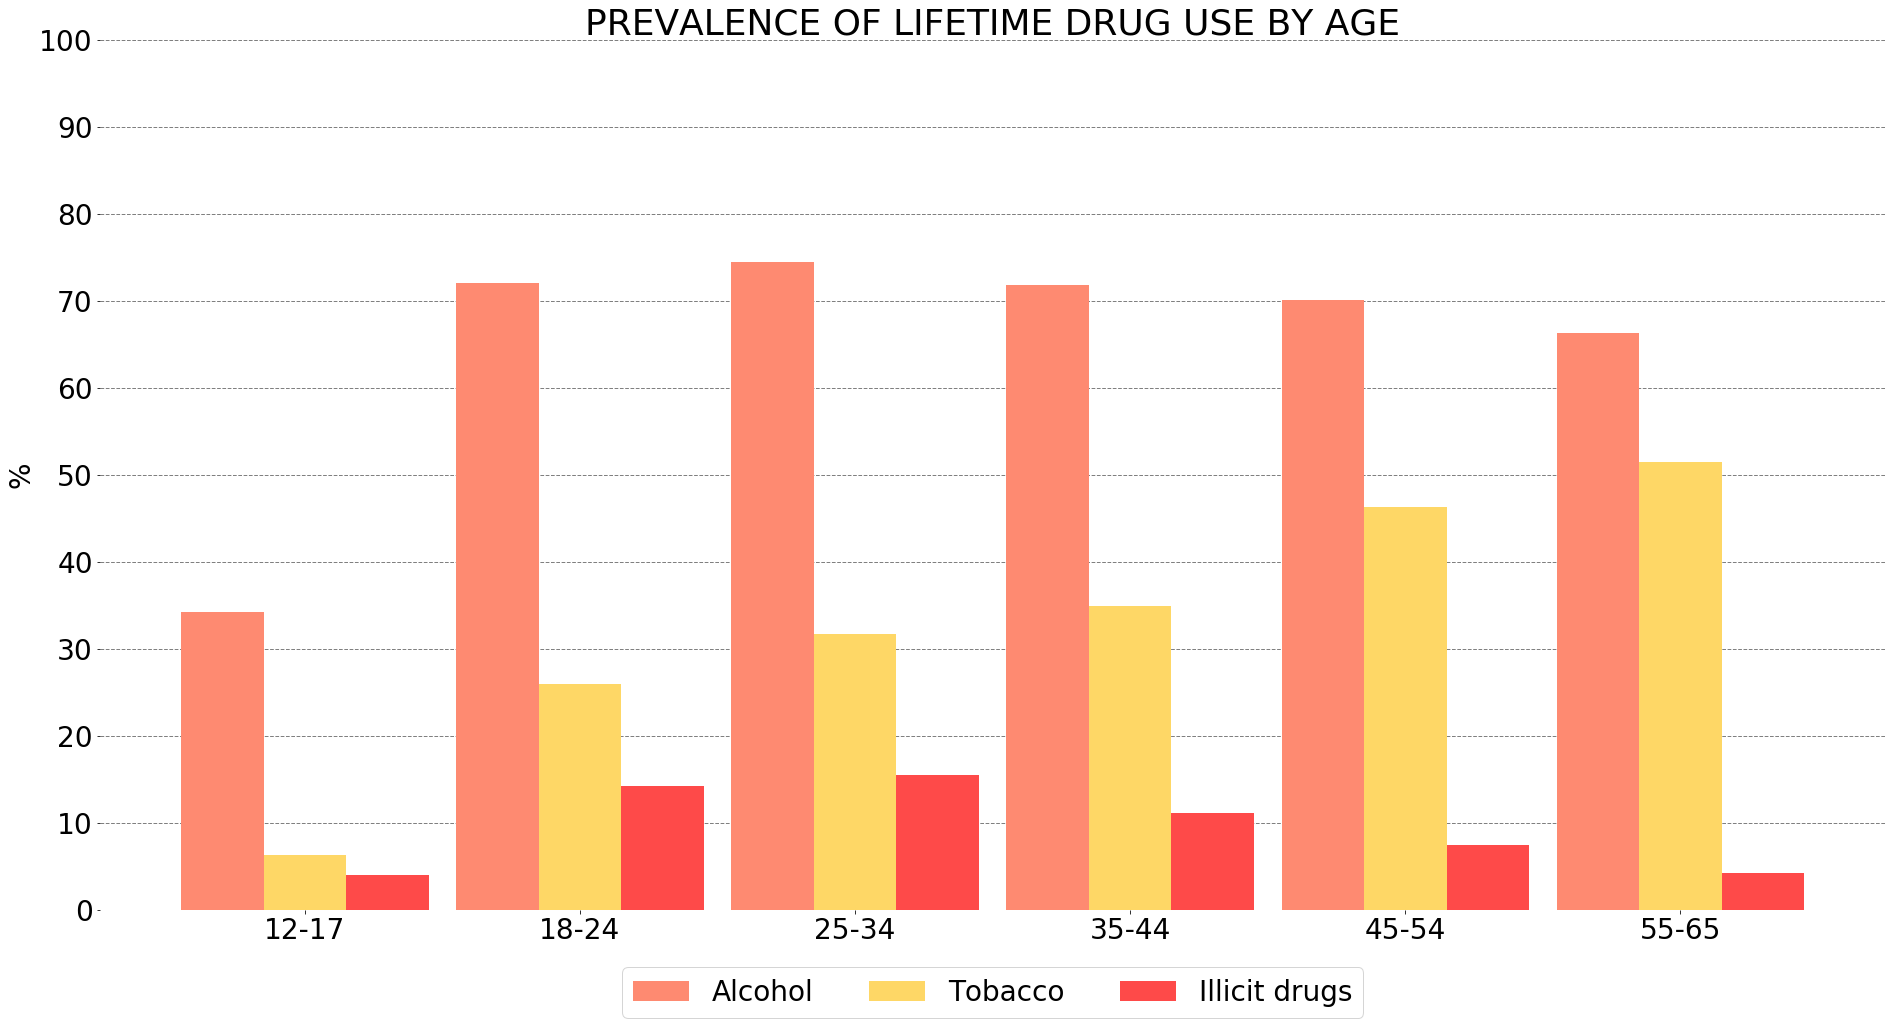

In [2]:
# define dataframe
df_age = df[df['cat']=='idade']
# define x and y locacions
x = np.array([1, 2, 3, 4, 5, 6])
y = np.arange(0,101,10)
# create subplot
fig, ax = plt.subplots(1, figsize=(32,16))
# plot bars
plt.bar(x - 0.3, df_age['A_vida'].values, width = 0.3, color = '#fe8a71')
plt.bar(x, df_age['Cig_vida'].values, width = 0.3, color = '#fed766')
plt.bar(x + 0.3, df_age['ili_vida'].values, width = 0.3, color = '#fe4a49')
# define y limits and label
ax.set_ylim([0,100])
ax.set_ylabel('%', fontsize = 28)
# define legend and title
ax.legend(['Alcohol','Tobacco','Illicit drugs'], loc = 'upper center', 
          fontsize = 28, bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.title('Prevalence of lifetime drug use by age'.upper(), fontsize = 36)
# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)
# x and y ticks
plt.yticks(y, fontsize = 28)
plt.xticks(x, ['12-17', '18-24', '25-34', '35-44', '45-54', '55-65'], fontsize = 28)
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# save pic
plt.savefig('age.png', facecolor=fig.get_facecolor(), edgecolor='none')

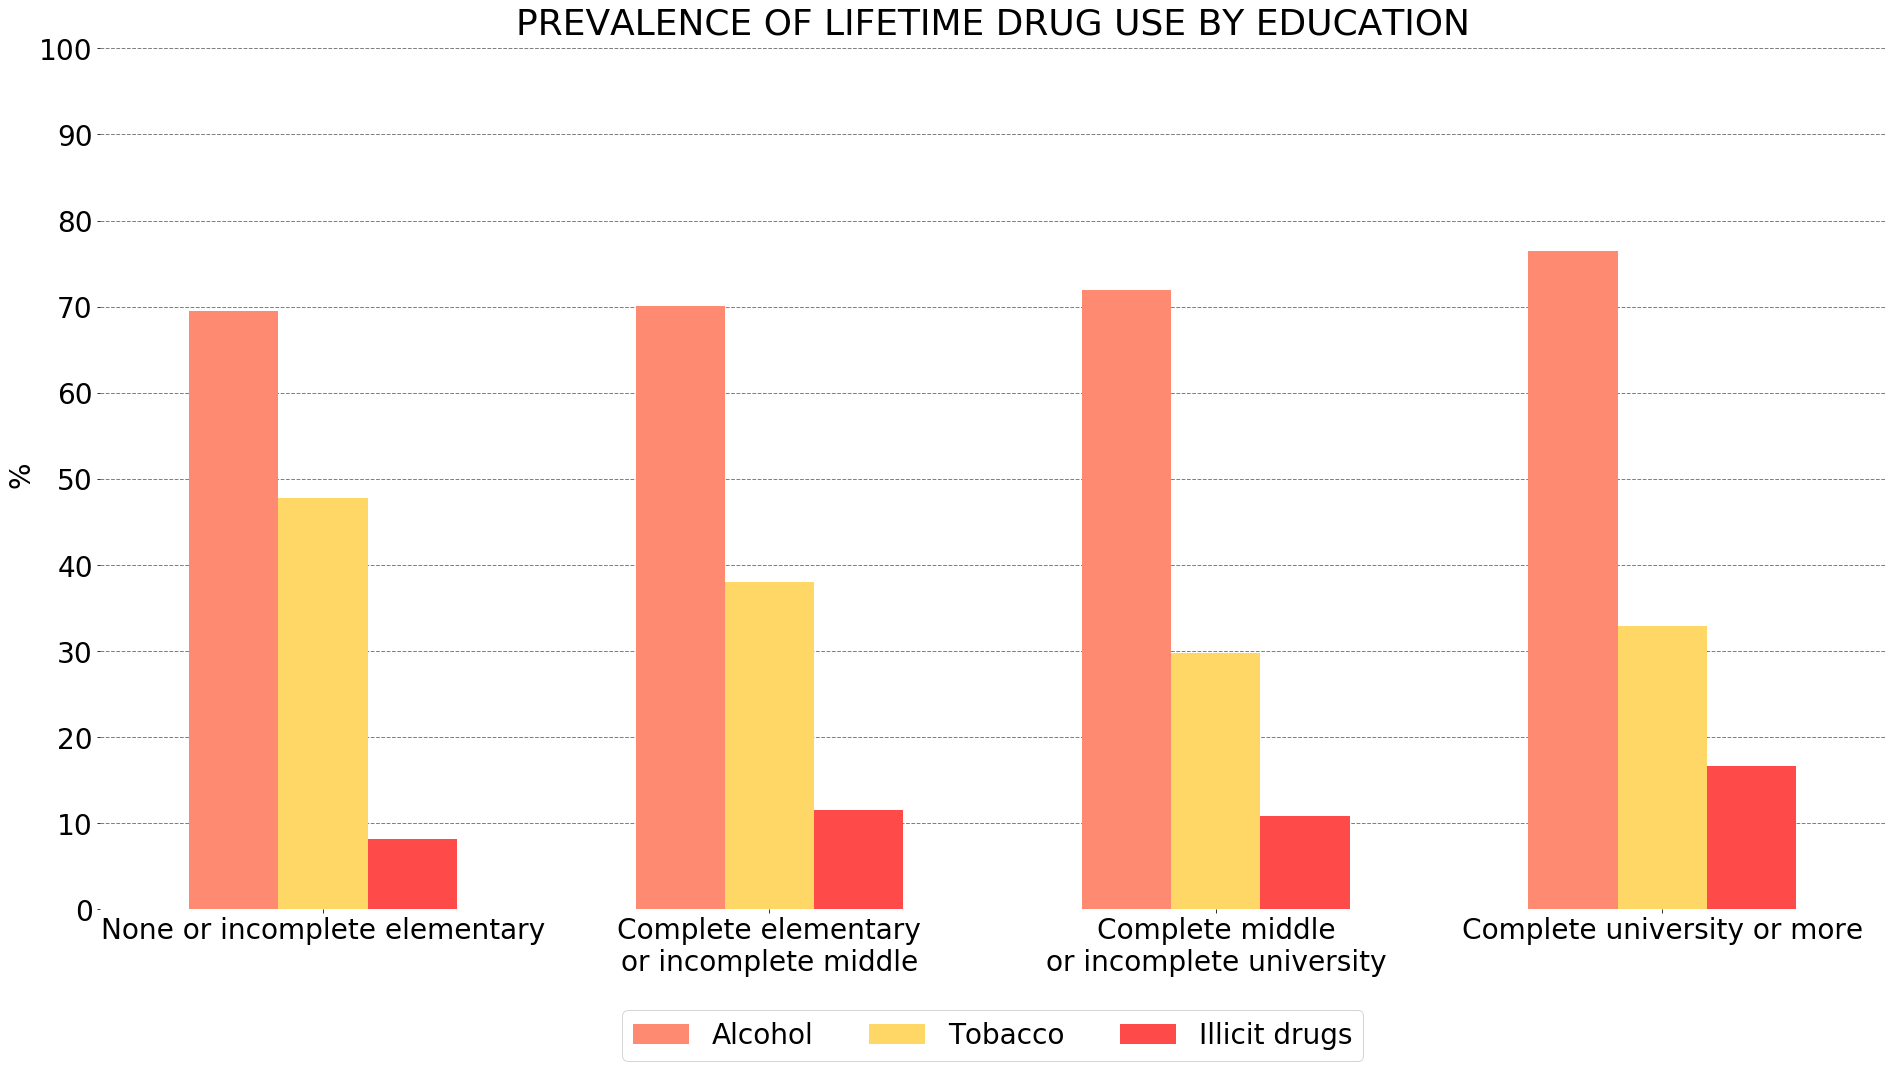

In [3]:
# define dataframe
df_study = df[df['cat']=='escolaridade']
# define x locations and y ticks
x = np.array([2, 4, 6, 8])
yticks = np.arange(0,101,10)
# create subplot
fig, ax = plt.subplots(1, figsize=(32,16))
# plot bars
plt.bar(x-0.4, df_study['A_vida'].values, width = 0.4, color = '#fe8a71')
plt.bar(x, df_study['Cig_vida'].values, width = 0.4, color = '#fed766')
plt.bar(x+0.4, df_study['ili_vida'].values, width=0.4, color = '#fe4a49')
# set limits
ax.set_ylim([0,101])
ax.set_xlim([1,9])
# labels, legends, and title
ax.set_ylabel('%', fontsize = 28)
ax.legend(['Alcohol','Tobacco','Illicit drugs'], loc = 'upper center', fontsize = 28, bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.title('Prevalence of lifetime drug use by education'.upper(), fontsize = 36)
# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)
# x and y ticks
plt.yticks(yticks, fontsize = 28)
plt.xticks(x, ['None or incomplete elementary', 'Complete elementary\nor incomplete middle', 
               'Complete middle\nor incomplete university', 'Complete university or more'], fontsize = 28)
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# save pic
plt.savefig('education.png', facecolor=fig.get_facecolor(), edgecolor='none')

# Alcohol policies

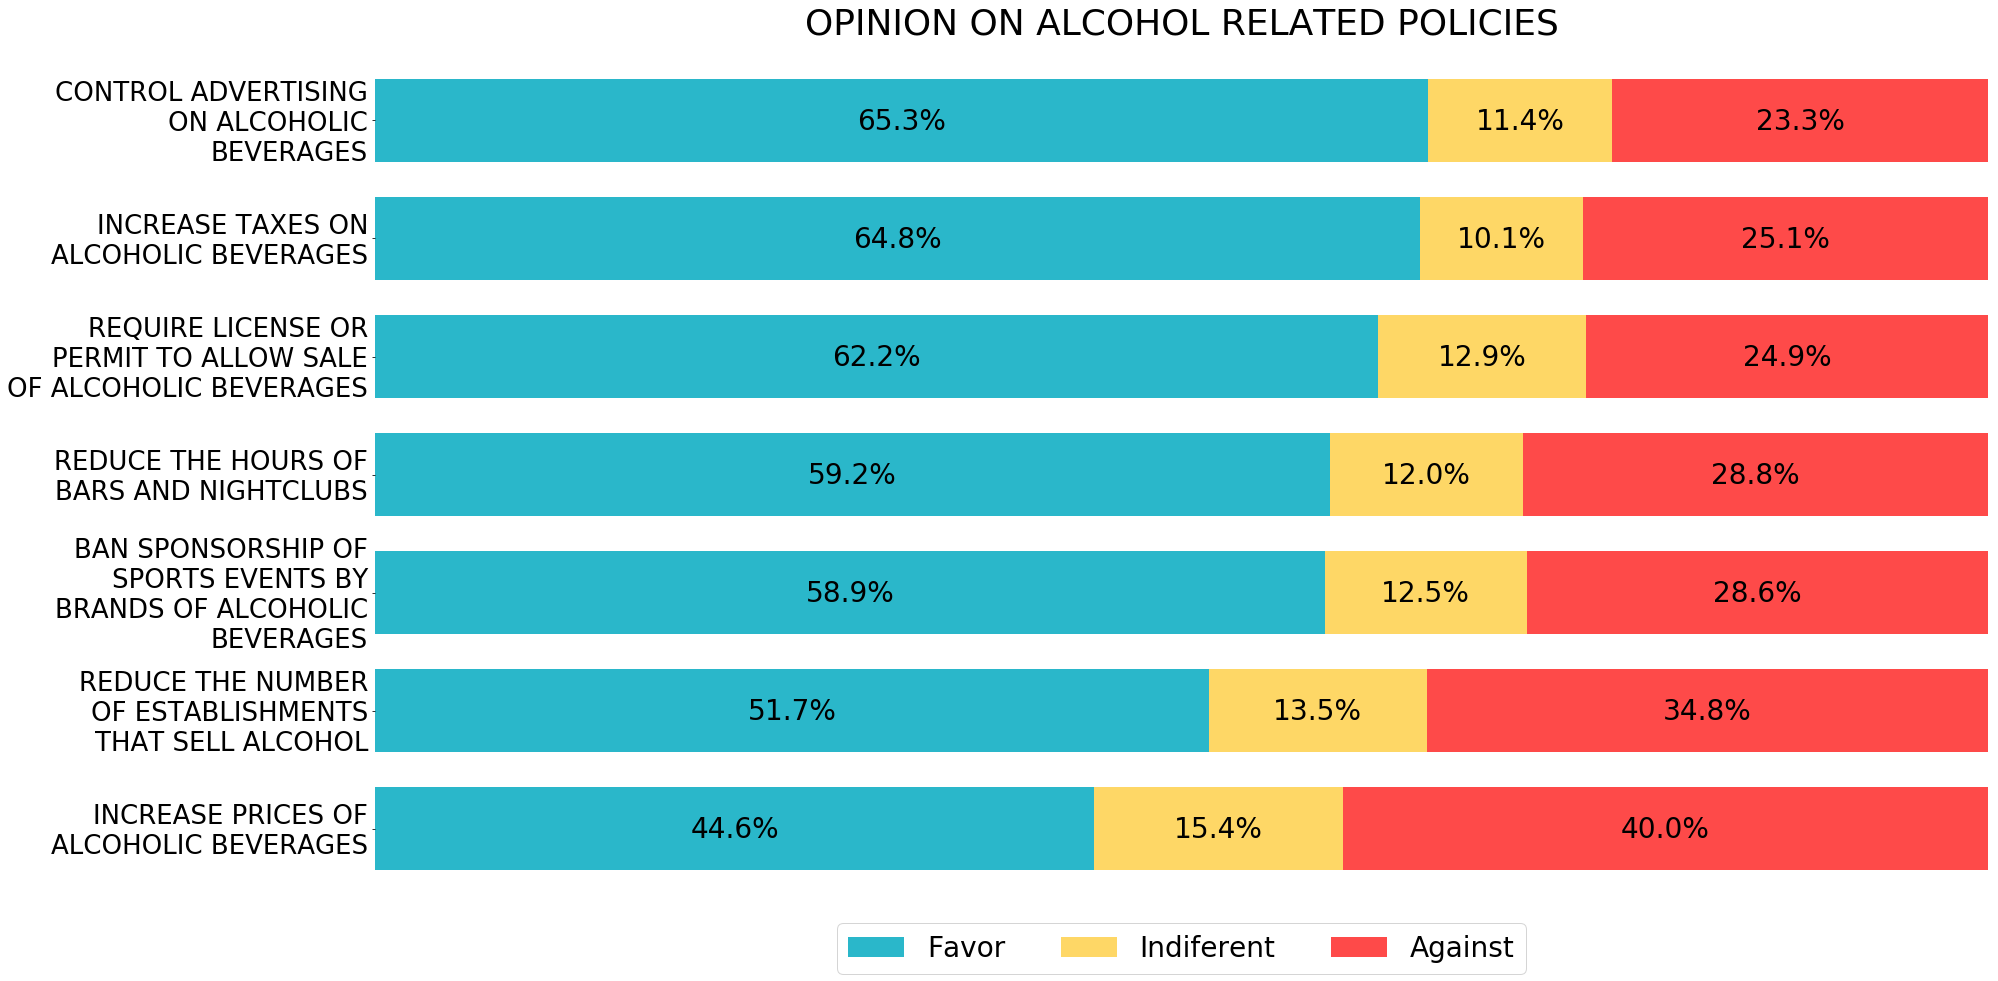

In [4]:
# load dataframe
df_c = pd.read_csv('drugs_alc.csv')
# sort and translate
df_c.sort_values(by='favor', ascending=False, inplace=True)
df_c['policy_en'] = ['Control advertising\non alcoholic\nbeverages', 
                     'Increase taxes on\nalcoholic beverages', 
                     'Require license or\npermit to allow sale\nof alcoholic beverages', 
                     'Reduce the hours of\nbars and nightclubs',
                     'Ban sponsorship of\nsports events by\nbrands of alcoholic\nbeverages', 
                     'Reduce the number\nof establishments\nthat sell alcohol',
                     'Increase prices of\nalcoholic beverages']

# define function to print the values in the bars
def display_values(y, barcollection, bottom):
    for i, b in enumerate(barcollection):
        plt.text(bottom[i] + y[i]/2, i+0.925, str(y[i])+'%',fontsize=28, ha='center')

        
# create subplot
fig, ax = plt.subplots(1, figsize=(32, 16))
# define x locations
x = np.array([1,2,3,4,5,6,7])
# sort again and reset index
df_c.sort_values(by='favor', ascending=True, inplace=True)
df_c.reset_index(inplace=True)
# plot bars
bars_f = plt.barh(x, df_c['favor'], height=0.7, align='center', color='#2ab7ca')
bars_i = plt.barh(x, df_c['Indiferent'], height=0.7, align='center', color='#fed766',left=df_c['favor'])
bars_a = plt.barh(x, df_c['against'], height=0.7, align='center', color='#fe4a49',left=df_c['favor']+df_c['Indiferent'])
# display values in the bars
display_values(df_c['favor'], bars_f, np.zeros(7))
display_values(df_c['Indiferent'], bars_i, df_c['favor'])
display_values(df_c['against'], bars_a, df_c['favor']+df_c['Indiferent'])
# x limits
ax.set_xlim([0,100])
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# x and y ticks (I changed from bars to horizontal bars so X is now Y)
ax.set_xticks([])
plt.yticks(x, [i.upper() for i in df_c['policy_en']], fontsize=26)
# legend and title
ax.legend(['Favor','Indiferent','Against'], fontsize=28, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.title('Opinion on alcohol related policies'.upper(), fontsize=36)
# adjust layout and save pic
plt.subplots_adjust(left=0.2)
#plt.tight_layout()
plt.savefig('opinion.png', facecolor=fig.get_facecolor(), edgecolor='none')

# Perception of risk

In [5]:
# load dataframe
df_p = pd.read_csv('drugs_per.csv')
# sort values and translate
df_p.sort_values(by='high_risk', ascending=False, inplace=True)
df_p['question_en'] = [ 'Crack, Merla, Oxi, or Cocaine Paste once or twice a week',
                        'Cocaine once or twice a week',
                        '1 or more packs of cigarretes per day',
                        'Crack, Merla, Oxi or cocaine Paste once a month',
                        'Drink 4 to 5 doses of alcohol almost every day',
                        'Anabolic Steroid once or twice a week',
                        'LSD once or twice a week',
                        'Cocaine once a month',
                        'Cannabis once or twice a week',
                        'LSD once or twice in a lifetime',
                        'Cannabis once a month',
                        'Anabolic Steroid once or twice in a lifetime',
                         'Drinks 5 or more doses of alcohol per week']
# add high and moderate risk to create 'some risk'
df_p['some_risk'] = df_p['high_risk']+df_p['low_moderate']
# sort by the new colunm
df_p.sort_values(by='some_risk', ascending=True, inplace=True)
df_p

,drug,question,no_risk,low_moderate,high_risk,question_en,some_risk
5,Droga ilicita,LSD 1 ou 2 vezes na vida,2.1,21.0,60.3,LSD once or twice in a lifetime,81.3
6,Droga ilicita,LSD 1 ou 2 vezes por semana,0.2,5.1,78.9,LSD once or twice a week,84.0
3,Medicamentos,Esteroide anabolizante 1 ou 2 vezes na vida,2.6,28.9,56.1,Anabolic Steroid once or twice in a lifetime,85.0
4,Medicamentos,Esteroide anabolizante 1 ou 2 vezes por semana,0.1,8.3,79.7,Anabolic Steroid once or twice a week,88.0
7,Droga ilicita,Maconha 1 vez no mes,5.0,31.7,57.2,Cannabis once a month,88.9
8,Droga ilicita,maconha 1 ou 2 vezes na semana,1.9,18.2,74.2,Cannabis once or twice a week,92.4
9,Droga ilicita,Cocaina 1 vez no mes,0.7,17.3,75.4,Cocaine once a month,92.7
11,Droga ilicita,"Crack, merla, oxi ou pasta base 1 vez por mes",0.5,7.7,85.6,"Crack, Merla, Oxi or cocaine Paste once a month",93.3
10,Droga ilicita,Cocaina 1 ou 2 vezes na semana,0.2,4.9,88.6,Cocaine once or twice a week,93.5
12,Droga ilicita,"Crack, merla, oxi ou pasta base 1 ou 2 vezes p...",0.1,2.1,91.6,"Crack, Merla, Oxi, or Cocaine Paste once or tw...",93.7


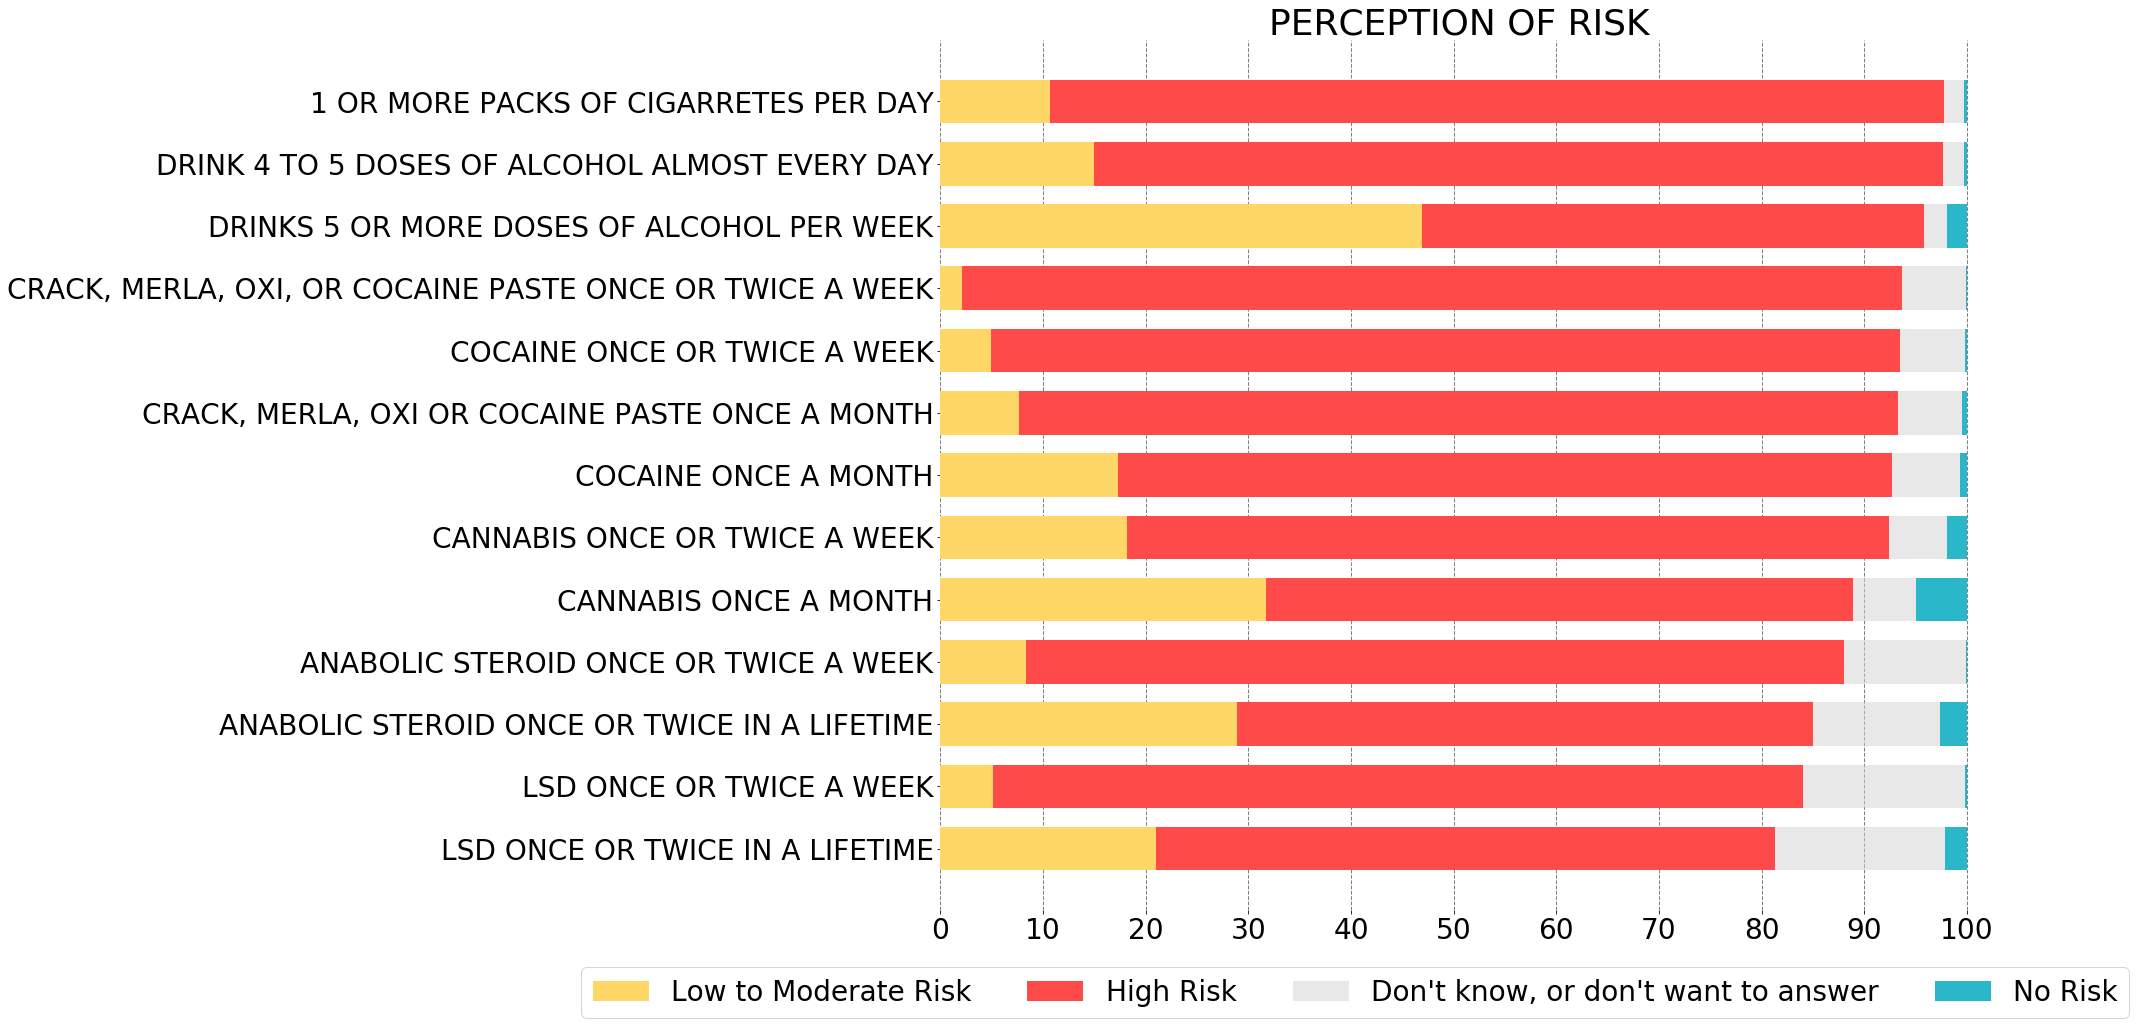

In [6]:
# define x and y locations
y = np.arange(1,14)
x = np.arange(0,101,10)
# create subplot
fig, ax = plt.subplots(1, figsize=(32,16))
# define value for 'don't know or don't want to answer'
total = np.array([100]*13) - (df_p['low_moderate'] + df_p['high_risk'] + df_p['no_risk'])
# plot bars
plt.barh(y, df_p['low_moderate'], height=0.7, color='#fed766')
plt.barh(y, df_p['high_risk'], height=0.7, left = df_p['low_moderate'], color='#fe4a49')
plt.barh(y, total, height=0.7, left = df_p['low_moderate'] + df_p['high_risk'], color = 'lightgrey', alpha = 0.5)
plt.barh(y, df_p['no_risk'], height=0.7, left = df_p['low_moderate'] + df_p['high_risk'] + total,
        color='#2ab7ca')
# Legend and title
plt.legend(['Low to Moderate Risk', 'High Risk', "Don't know, or don't want to answer", 'No Risk'],
           fontsize = 28, loc = 'upper center', bbox_to_anchor = (0.4, -0.05), ncol=4)
plt.title('perception of risk'.upper(), fontsize = 36)
# x and y ticks and limits
plt.yticks(y, [i.upper() for i in df_p['question_en']], fontsize = 28)
plt.xticks(x, x, fontsize = 28)
plt.xlim([0,101])
# grid
ax.grid(color = 'grey', linestyle = 'dashed', linewidth = 1, axis = 'x')
ax.set_axisbelow(True)
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# adjust chart layout
plt.subplots_adjust(left=0.45)
#plt.tight_layout()
# save pic
plt.savefig('risk.png', facecolor=fig.get_facecolor(), edgecolor='none')

# MAP

In [7]:
# Build dataframe
df_reg = df[df['cat']=='regiao']
# Load Shape file
dir_path = os.path.dirname(os.path.realpath('\\py\\Estados_do_Brasil\\Brasil.shp'))
df_br = gpd.read_file(dir_path)
# Merge dataframes
df_br = df_br.set_index('REGIAO').join(df_reg.set_index('item'))
df_br.head()

,ESTADOS,COD_UF,UF,geometry,A_vida,A_binge,Cig_vida,Cig_30,Med_vida,ili_vida,ili_30,cat
Centro Oeste,Distrito Federal,53.0,DF,POLYGON ((-48.28666681849336 -15.8428175700448...,73.2,30.5,37.1,14.4,8.0,10.2,1.7,regiao
Centro Oeste,Goiás,52.0,GO,POLYGON ((-53.25072082311647 -17.6187670716988...,73.2,30.5,37.1,14.4,8.0,10.2,1.7,regiao
Centro Oeste,Mato Grosso,51.0,MT,POLYGON ((-61.63252583092265 -9.26620556391992...,73.2,30.5,37.1,14.4,8.0,10.2,1.7,regiao
Centro Oeste,Mato Grosso do Sul,50.0,MS,POLYGON ((-57.7517508273084 -17.56416707164806...,73.2,30.5,37.1,14.4,8.0,10.2,1.7,regiao
Nordeste,Alagoas,27.0,AL,(POLYGON ((-36.39119330741482 -10.500822065069...,65.4,27.9,28.2,10.5,8.3,8.3,1.2,regiao


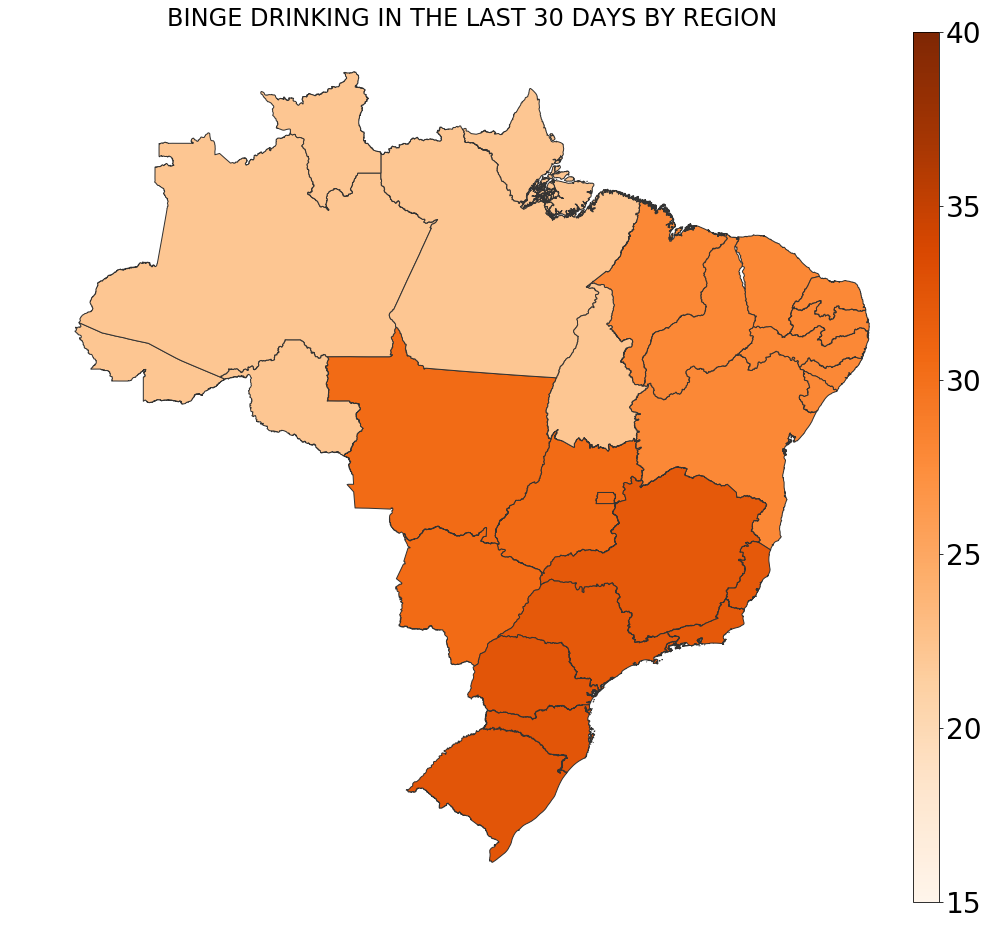

In [8]:
# Plot Map
# create a subplot and remove axis
fig, ax = plt.subplots(1, figsize=(32, 16))
ax.axis('off')
# define a linear colormap
vmin, vmax = 15, 40
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#fed766', 'orange', '#fe4a49'])
# plot map
df_br.plot(cmap='Oranges', column = 'A_binge', ax=ax, linewidth=1, edgecolor='0.2',vmin=vmin, vmax=vmax)
plt.title('Binge drinking in the last 30 days by region'.upper(), fontsize=24)

#BINGE DRINKING: "uso de seis ou mais doses de álcool em uma única ocasião
#ao menos uma vez por mês" (WHO, 2014).

# build color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=28)
# save pic
plt.savefig('binge.png', facecolor='white', edgecolor='none')

# Age of first use

In [9]:
# load dataframe
df_age = pd.read_csv('drugs_age.csv')
df_age

,Median age,Sex,drug
0,15.7,Men,Alcohol
1,17.1,Women,Alcohol
2,16.6,Men,Illicit
3,16.6,Women,Illicit
4,15.1,Men,Tobacco
5,14.9,Women,Tobacco


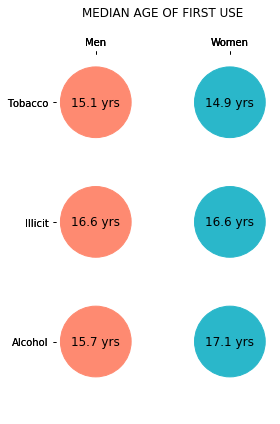

In [10]:
# create subplot
fig, ax = plt.subplots(1, figsize=(4,6))
# define colors
color = ['#fe8a71', '#2ab7ca', 
         '#fe8a71', '#2ab7ca', 
         '#fe8a71', '#2ab7ca']
# define x and y locations
x = np.array([0, 1, 0, 1, 0, 1])
y = np.array([0, 0, 0.5 , 0.5, 1, 1])
# plot scatter chart
plt.scatter(x, y, s= 5000, color = color)
# define x and y ticks
plt.xticks(x, df_age['Sex'])
plt.yticks(y, df_age.drug)
# define x and y limits
plt.xlim([-0.3, 1.3])
plt.ylim([-0.3, 1.2])
# display values
for i, value in enumerate(x):
    plt.text(value, y[i]-0.015, str(df_age['Median age'].values[i]) + ' yrs',fontsize=12, ha='center')
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# change x ticks position    
ax.xaxis.set_ticks_position('top')
# plot title and adjust layout
plt.title('Median age of first use\n'.upper())
plt.tight_layout()
# save pic
plt.savefig('first_use.png', facecolor='white', edgecolor='none')

# Prevalence of drug use (Lifetime, 12 months, 30 days)

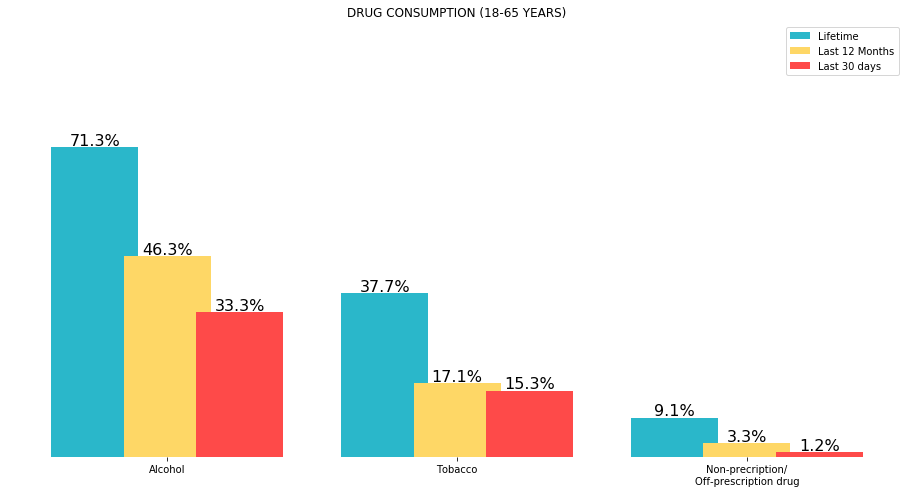

In [11]:
# load dataframe
df_overall = pd.read_csv('drugs_18.csv')
# define x location
x = np.array([0,1,2])
# create subplot
fig, ax = plt.subplots(1, figsize = (16, 8))
# plot bars
b1 = plt.bar(x-0.25, df_overall['Lifetime'], width = 0.3, color = '#2ab7ca')
b2 = plt.bar(x, df_overall['12months'], width = 0.3, color = '#fed766')
b3 = plt.bar(x+0.25, df_overall['30days'], width = 0.3, color = '#fe4a49')
# define x and y ticks and limits
plt.xticks(x, ['Alcohol', 'Tobacco', 'Non-precription/\nOff-prescription drug'])
plt.yticks([])
plt.ylim([0,100])
# plot legend and title
plt.legend(['Lifetime', 'Last 12 Months', 'Last 30 days'])
plt.title('Drug consumption (18-65 years)'.upper())
# define function to print values on top of bars
def display_values(y, barcollection, adj):
    for i, b in enumerate(barcollection):
        plt.text(i + adj, y[i] + 0.5, str(y[i]) + '%',fontsize=16, ha='center')
# display values on top of bars
display_values(df_overall['Lifetime'], b1, -0.25)
display_values(df_overall['12months'], b2, 0)
display_values(df_overall['30days'], b3, 0.25)
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# save pic
plt.savefig('consumption_18.png', facecolor='white', edgecolor='none')

# Non-prescription/off-prescription medications and Illicit drugs

In [12]:
# load dataframe
df_med = pd.read_csv('drugs_med.csv')
df_med.sort_values(by = 'Lifetime', inplace = True)

# define colors for categories
color = []
for i in df_med['Category']:
    if i == 'Illicit drug':
        color.append('#fe8a71')
    else:
        color.append('#2ab7ca')
# create a colunm to hold the colors     
df_med['color'] = color
df_med

,Lifetime,12months,30days,Drug,Category,color
14,0.2,0.1,0.0,Ketamine,Illicit drug,#fe8a71
12,0.3,0.1,0.0,Heroin,Illicit drug,#fe8a71
2,0.4,0.2,0.0,Anticholinergics,Non-prescription/off-prescription,#2ab7ca
11,0.4,0.2,0.0,Onjectable drugs,Illicit drug,#fe8a71
15,0.4,0.1,0.1,Ayahuasca,Illicit drug,#fe8a71
3,0.5,0.1,0.0,Barbirutes,Non-prescription/off-prescription,#2ab7ca
10,0.7,0.2,0.0,Ecstasy/ MDMA,Illicit drug,#fe8a71
13,0.8,0.2,0.0,LSD,Illicit drug,#fe8a71
8,0.9,0.3,0.1,Crack and similars,Illicit drug,#fe8a71
0,1.1,0.2,0.1,Anabolic steroids,Non-prescription/off-prescription,#2ab7ca


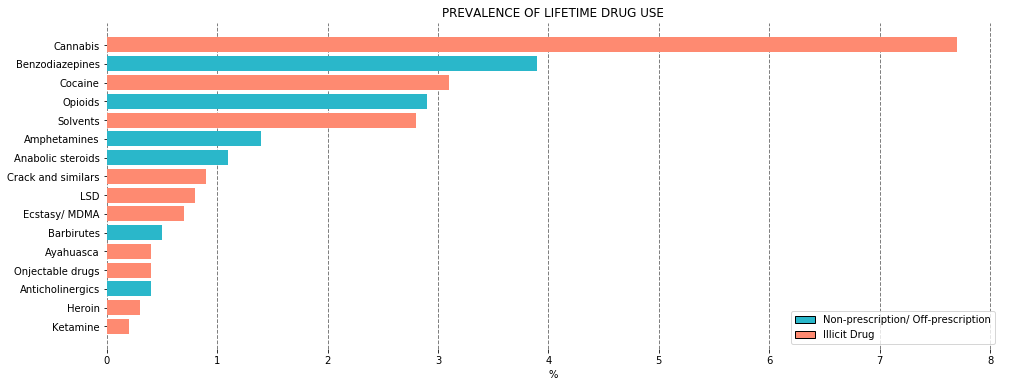

In [13]:
# create subplot
fig, ax = plt.subplots(1, figsize = (16,6))
# plot bar
plt.barh(df_med['Drug'], df_med['Lifetime'], color = df_med['color'])
# create legend handles
legend_elements =[Patch(facecolor='#2ab7ca', edgecolor='black', label='Non-prescription/ Off-prescription'),
                  Patch(facecolor='#fe8a71', edgecolor='black', label='Illicit Drug')]
# grid
ax.grid(color = 'grey', linestyle = 'dashed', linewidth = 1, axis = 'x')
ax.set_axisbelow(True)
# x label and title
ax.set_xlabel('%')
plt.title('Prevalence of lifetime drug use'.upper())
# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# plot legend
plt.legend(handles=legend_elements)
# save pic
plt.savefig('illicit_and_med.png', facecolor='white', edgecolor='none')